In [91]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [94]:
df.loc[(df['toxic']==1) | (df['identity_hate']==1) | (df['insult']==1) | (df['obscene']==1) | (df['threat']==1) | (df['severe_toxic']==1),'toxic_detected']='positive'
df.loc[(df['toxic']==0) & (df['identity_hate']==0) & (df['insult']==0) & (df['obscene']==0) & (df['threat']==0) & (df['severe_toxic']==0),'toxic_detected']='negative'
df.head(20)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,negative
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,negative
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,negative
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,negative
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,negative
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,negative
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,positive
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,negative
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,negative
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,negative


In [ ]:
df[df['toxic_detected']=='positive'].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,positive
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,positive
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,positive
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,positive
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,positive


In [ ]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,negative
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,negative
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,negative
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,negative
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,negative
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,negative
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,positive
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,negative
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,negative
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,negative


In [ ]:
#seeing the comment text
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [ ]:
#seeing the comments details by changing iloc values
df[df.columns[2:]].iloc[6]

toxic                    1
severe_toxic             1
obscene                  1
threat                   0
insult                   1
identity_hate            0
toxic_detected    positive
Name: 6, dtype: object

In [ ]:
#showing the values which are toxic
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,positive
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,positive
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,positive
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,positive
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,positive


**Preprocessing**

In [95]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [96]:
from tensorflow.keras.layers import TextVectorization

In [97]:
x=df['comment_text']
y=df[df.columns[2:]].values

In [98]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'toxic_detected'],
      dtype='object')

In [99]:
df[df.columns[2:]].values

array([[0, 0, 0, ..., 0, 0, 'negative'],
       [0, 0, 0, ..., 0, 0, 'negative'],
       [0, 0, 0, ..., 0, 0, 'negative'],
       ...,
       [0, 0, 0, ..., 0, 0, 'negative'],
       [0, 0, 0, ..., 0, 0, 'negative'],
       [0, 0, 0, ..., 0, 0, 'negative']], dtype=object)

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 'negative'],
       [0, 0, 0, ..., 0, 0, 'negative'],
       [0, 0, 0, ..., 0, 0, 'negative'],
       ...,
       [0, 0, 0, ..., 0, 0, 'negative'],
       [0, 0, 0, ..., 0, 0, 'negative'],
       [0, 0, 0, ..., 0, 0, 'negative']], dtype=object)

In [100]:
MAX_WORDS=180000

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1800,
                               output_mode='int')

In [ ]:
vectorizer.adapt(x.values)

In [ ]:
vectorized_text = vectorizer(x.values)

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

ValueError: ignored

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [101]:
#converting lower case
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,negative
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0,negative
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0,negative
3,0001b41b1c6bb37e,\nmore\ni cant make any real suggestions on im...,0,0,0,0,0,0,negative
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,negative


In [102]:
#numeric removal
pattern = r'\d+'
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub(pattern, '', x))
df.loc[:, ['comment_text']]

,comment_text
0,explanation\nwhy the edits made under my usern...
1,daww he matches this background colour im seem...
2,hey man im really not trying to edit war its j...
3,\nmore\ni cant make any real suggestions on im...
4,you sir are my hero any chance you remember wh...
...,...
159566,and for the second time of asking when your vi...
159567,you should be ashamed of yourself \n\nthat is ...
159568,spitzer \n\numm theres no actual article for p...
159569,and it looks like it was actually you who put ...


In [103]:
import string

In [104]:
#removing punctuatuion
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
# Apply the function to the 'comment' column of the dataframe
df['comment_text'] = df['comment_text'].apply(remove_punctuation)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,negative
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0,negative
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0,negative
3,0001b41b1c6bb37e,\nmore\ni cant make any real suggestions on im...,0,0,0,0,0,0,negative
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,negative


In [105]:
import nltk
nltk.download('stopwords')
#Remove stopwords
stop=stopwords.words("english")
print(stop)
df.head(3)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,negative
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0,negative
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0,negative


In [106]:
stop.extend(["could","though","would","also","many",'much'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [107]:
nltk.download('punkt')
#After removing stopwords
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop]))
df['Words'] = df['comment_text'].apply(lambda x : len(str(x).split()))

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected,Words
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,negative,26
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0,negative,11
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,negative,22
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,negative,49
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,negative,6


In [108]:
#counting the number of words
df['Word_count'] = df['comment_text'].apply(lambda x : len(str(x).split()))
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected,Words,Word_count
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,negative,26,26
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0,negative,11,11
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0,negative,22,22
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,negative,49,49
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,negative,6,6


In [109]:
# Define a function to remove short words
def remove_short_words(text):
    words = text.split()
    filtered_words = []
    for word in words:
        if len(word) > 2:
            filtered_words.append(word)
    filtered_text = " ".join(filtered_words)
    return filtered_text

# Apply the function to the 'text' column of the dataframe
df['comment_text'] = df['comment_text'].apply(remove_short_words)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected,Words,Word_count
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,negative,26,26
1,000103f0d9cfb60f,daww matches background colour seemingly stuck...,0,0,0,0,0,0,negative,11,11
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,negative,22,22
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,negative,49,49
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,negative,6,6


**EndOfPreprocessing**

**StartofAanysis**

In [ ]:
toxic_value=df['toxic'].value_counts()
severe_toxic=df['severe_toxic'].value_counts()
obsence=df['obscene'].value_counts()
threat=df['threat'].value_counts()
insult=df['insult'].value_counts()
hateful=df['identity_hate'].value_counts()

In [ ]:
toxic_value

0    144277
1     15294
Name: toxic, dtype: int64

In [ ]:
obsence

0    151122
1      8449
Name: obscene, dtype: int64

In [ ]:
threat

0    159093
1       478
Name: threat, dtype: int64

In [ ]:
insult

0    151694
1      7877
Name: insult, dtype: int64

In [ ]:
hateful

0    158166
1      1405
Name: identity_hate, dtype: int64

In [ ]:
severe_toxic

0    157976
1      1595
Name: severe_toxic, dtype: int64

**ModelAnalysis**

In [ ]:
import plotly.express as px

import plotly.express as px

In [ ]:
fig_toxic = px.pie(values = [(144277/159570)*100, (15294/159277)*100],
             names = ['Not Toxic', 'Toxic'],
             color_discrete_sequence = ['brown'],
             hole = 0.5)

fig_toxic.show()

In [ ]:
fig_obsence = px.pie(values = [(151122/159570)*100, (8449/159277)*100],
             names = ['Not Obsence', 'Obsence'],
             color_discrete_sequence = ['royalblue'],
             hole = 0.5)

fig_obsence.show()

In [ ]:
fig_obsence = px.pie(values = [(159093/159570)*100, (478/159277)*100],
             names = ['Not Threat', 'Threat'],
             color_discrete_sequence = ['gray'],
             hole = 0.5)

fig_obsence.show()

In [ ]:
fig_obsence = px.pie(values = [(157976/159570)*100, (7877/159277)*100],
             names = ['Not Insulting', 'Insulting'],
             color_discrete_sequence = ['green'],
             hole = 0.5)

fig_obsence.show()

In [ ]:
fig_obsence = px.pie(values = [(158166/159570)*100, (1405/159277)*100],
             names = ['Not Hateful', 'Hateful'],
             color_discrete_sequence = ['brown'],
             hole = 0.5)

fig_obsence.show()

In [ ]:
fig_obsence = px.pie(values = [(158166/159570)*100, (1595/159277)*100],
             names = ['Not Severe Toxic', 'Severe Toxic'],
             color_discrete_sequence = ['navy'],
             hole = 0.5)

fig_obsence.show()

In [ ]:
fig = px.pie(values = [(15294/35098)*100, (8449/35098)*100,(478/35098)*100, (7877/35098)*100,(1405/35098)*100, (1595/35098)*100],
             names = ['Toxic', 'Obsence','Threat','Insult','Hateful','Severe Toxic'],
             color_discrete_sequence = ['brown'],
             hole = 0.5)

fig.show()

In [ ]:
fig_nothate = px.pie(values = [(15294/35098)*100, (8449/35098)*100,(478/35098)*100, (7877/35098)*100,(1405/35098)*100, (1595/35098)*100],
             names = ['Toxic', 'Obsence','Threat','Insult','Hateful','Severe Toxic'],
             color_discrete_sequence = ['brown'],
             hole = 0.5)

fig_nothate.show()

In [ ]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,Words,Word_count
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,33.688596,33.688596
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,52.086896,52.086896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,37.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1250.000000,1250.000000


In [ ]:
fig = px.pie(values = [(20620/24783)*100, (4163/24783)*100],
             names = ['Bullying', 'Not Bullying'],
             color_discrete_sequence = ['brown'],
             hole = 0.5)

fig.show()

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected,Words,Word_count
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,negative,26,26
1,000103f0d9cfb60f,daww matches background colour seemingly stuck...,0,0,0,0,0,0,negative,11,11
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,negative,22,22
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,negative,49,49
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,negative,6,6


In [ ]:
df[df['identity_hate']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected,Words,Word_count
42,001810bf8c45bf5f,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,positive,58,58
105,00472b8e2d38d1ea,pair jewhating weiner nazi schmucks,1,0,1,0,1,1,positive,5,5
176,006b94add72ed61c,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,positive,13,13
218,008e0818dde894fb,kill niggers hard others said included racists...,1,0,1,0,1,1,positive,9,9
238,0097dd5c29bf7a15,fuck gay boyu smellyfuck mum poopie,1,0,1,0,1,1,positive,12,12


**FeatureExtraction**

In [130]:
corpus = df['comment_text'].to_numpy()
corpus

array(['explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since retired',
       'daww matches background colour seemingly stuck thanks talk january utc',
       'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
       ...,
       'spitzer umm theres actual article prostitution ring crunch captain',
       'looks like actually put speedy first version deleted look',
       'really dont think understand came idea bad right away kind community goes bad ideas away instead helping rewrite'],
      dtype=object)

In [131]:
import seaborn as sns

In [132]:
import tensorflow as tf

device = tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0')

In [133]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus)
y = df['toxic_detected']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [ ]:
#svm model
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(accuracy)

0.9583054812834224


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
report = classification_report(y_test, y_pred )
print(report)

              precision    recall  f1-score   support

    negative       0.96      0.99      0.98     42964
    positive       0.92      0.65      0.76      4908

    accuracy                           0.96     47872
   macro avg       0.94      0.82      0.87     47872
weighted avg       0.96      0.96      0.96     47872



In [ ]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X_train.shape, X_test.shape

((111699, 223175), (47872, 223175))

In [ ]:
Y_train = pd.get_dummies(y_train)
Y_val = pd.get_dummies(y_test)
Y_train.shape, Y_val.shape

((111699, 2), (47872, 2))

In [ ]:
!pip install tensorflow_text

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding
from keras.preprocessing.text import Tokenizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9997493263144701
0.9503467580213903
0.9503467580213903


In [ ]:
#Ensemble methods from here
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
print(abc.score(X_train, y_train))
print(abc.score(X_test, y_test))

0.9454784733972551
0.9438711564171123


In [135]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9151278409090909


In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected,Words,Word_count
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,negative,26,26
1,000103f0d9cfb60f,daww matches background colour seemingly stuck...,0,0,0,0,0,0,negative,11,11
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,negative,22,22
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0,negative,49,49
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,negative,6,6


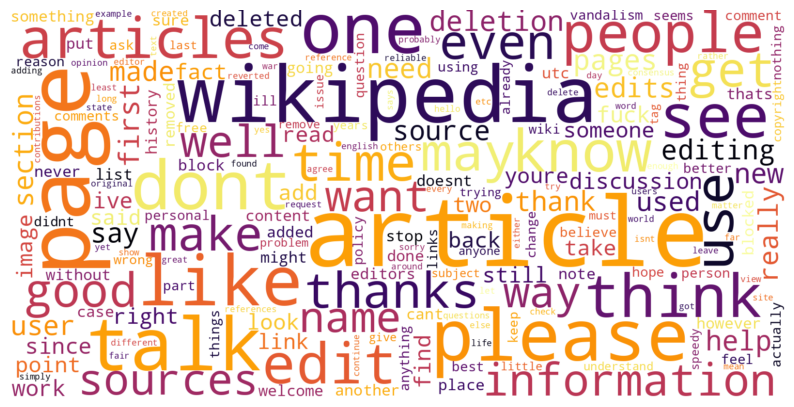

In [113]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize the text data
words = []
for text in df['comment_text']:
    words.extend(text.split())

# Count the frequency of each word
word_counts = Counter(words)

# Create a dictionary that maps each word to its frequency
word_freq = {word: count for word, count in word_counts.items() if len(word) > 2}

# Create the word cloud
wordcloud = WordCloud( width=1600,
    height=800,
    max_font_size=200,
    colormap='inferno',
    background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#colormap='viridis'

In [114]:
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import LambdaCallback
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.optimizers import RMSprop
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import random
import sys
import io
import re
import string
from keras.layers import Dense

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

import numpy as np

from keras import Sequential
from keras import layers

from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

You have TensorFlow version 2.12.0


In [115]:
max_features = 100
# cut texts after this number of words
# (among top max_features most common words)
max_len = 100
batch_size =32
#x_train[0:1]
#x_train

In [ ]:
max_len = 500       #length of sequence
batch_size = 256
epochs = 500

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#max_features = len(word_index) + 1   # (number of words in the vocabulary) + 1
#x_train = sequence.pad_sequences(x_train, maxlen=max_len, padding='pre')

In [116]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['comment_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 224319 unique tokens.


In [117]:
df['toxic_detected'].dtypes

dtype('O')

In [118]:
df['toxic_detected'] = df['toxic_detected'].apply(str)
df['toxic_detected'].dtypes

dtype('O')

In [119]:
!pip install "pad-sequences>=0.6.0"

In [120]:
from tensorflow import keras

from keras import preprocessing

In [121]:
from keras.utils import pad_sequences

In [122]:
features = tokenizer.texts_to_sequences(df['comment_text'].values)
features = pad_sequences(features, maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of input tensor:', features.shape)

Shape of input tensor: (159571, 250)


In [123]:
labels = pd.get_dummies(df['toxic_detected']).values
print('Shape of label tensor:', labels.shape)

Shape of label tensor: (159571, 2)


In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

In [125]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5,117,506
Trainable params: 5,117,506
Non-trainable params: 0
____________________________________________

In [126]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=[x_test, y_test])

Train...
Epoch 1/10
374/374 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.9425

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b0863a97b50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b0863a97b50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
374/374 [==============================] - 1025s 3s/step - loss: 0.1699 - accuracy: 0.9425 - val_loss: 0.1140 - val_accuracy: 0.9589
Epoch 2/10
374/374 [==============================] - 944s 3s/step - loss: 0.0870 - accuracy: 0.9682 - val_loss: 0.1145 - val_accuracy: 0.9608
Epoch 3/10
374/374 [==============================] - 964s 3s/step - loss: 0.0653 - accuracy: 0.9764 - val_loss: 0.1298 - val_accuracy: 0.9594
Epoch 4/10
374/374 [=====

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predicted))

NameError: ignored

In [1]:
import tensorflow_hub as hub

In [2]:
df.groupby('toxic_detected').describe()

NameError: ignored

In [ ]:
df_spam = df[df['toxic_detected']=='positive']
df_spam.shape

(16225, 11)

In [ ]:
df_ham = df[df['toxic_detected']=='negative']
df_ham.shape

(143346, 11)

In [ ]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(16225, 11)

In [ ]:
df_balanced = pd.concat([df_ham_downsampled, df_spam])
df_balanced.shape

(32450, 11)

In [ ]:
df_balanced['toxic_detected'].value_counts()

negative    16225
positive    16225
Name: toxic_detected, dtype: int64

In [ ]:
df_balanced['positive']=df_balanced['toxic_detected'].apply(lambda x: 1 if x=='positive' else 0)
df_balanced.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_detected,Words,Word_count,positive
19231,32d0ddc83f39a146,talk like reason dont appreciate samirthe fagg...,1,0,1,0,1,0,positive,17,17,1
34818,5d010d469500fe65,youre sad person fact failed rfa makes laugh h...,1,0,1,1,1,0,positive,15,15,1
65244,ae92f32e5b8a3f6c,wat duh fuck going,1,0,1,0,0,0,positive,4,4,1
80328,d6e50027e97f61c7,please add unsourced original content mohetjat...,0,0,0,0,0,0,negative,14,14,0
139382,ea027943ceb11682,dont understand english youre paranoid stupid ...,1,0,0,0,0,0,positive,13,13,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['comment_text'],df_balanced['positive'], stratify=df_balanced['positive'])

In [ ]:
X_train.head(4)

88258     copyedit request looking copyeditor homer simp...
93538     blocked obvious antisemite gareth hughes calle...
141141    last message act somebody talks jewish let eve...
151203    fuck motherfucker asshole asshole page hijacke...
Name: comment_text, dtype: object

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435168 , -0.5132724 , -0.8884571 , ..., -0.7474884 ,
        -0.7531473 ,  0.91964483],
       [-0.87208354, -0.50543964, -0.94446665, ..., -0.85847497,
        -0.7174535 ,  0.88082975]], dtype=float32)>

In [ ]:
e = get_sentence_embeding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [ ]:
cosine_similarity([e[0]],[e[3]])

array([[0.84703827]], dtype=float32)

In [ ]:
cosine_similarity([e[3]],[e[4]])

array([[0.9872036]], dtype=float32)

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [ ]:
len(X_train)

24337

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
model.fit(X_train, y_train, epochs=6)

Epoch 1/6
109/761 [===>..........................] - ETA: 3:21:04 - loss: 0.6589 - accuracy: 0.6198 - precision: 0.6173 - recall: 0.6502

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:

print(classification_report(y_test, y_predicted))

In [ ]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
model.predict(reviews)